# Includes test for:
0. Reports (Global and word level)
1. Visualizations
2. Debiasing
3. Metrics

# Reports

In [1]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.reports import NeighboursAnalysis, GlobalReport, WordReport

In [2]:
E = loader.WE().load(ename = 'glove-wiki-gigaword-300', normalize=True)

Direct bias (Bias by projection on the PCA based gender direction): 0.2515009939670563
Proximity bias (Ratio of biased neighbours by Indirect Bias): 0.31
Neighbour Analysis: 
           Neighbour  Bias by projection
0           pregnant            0.376227
1             mother            0.323706
2              woman            0.307836
3            midwife            0.282145
4           midwives            0.228787
5             nurses            0.170458
6        anesthetist            0.160549
7            nursing            0.149175
8          therapist            0.147842
9       anesthetists            0.140329
10         paramedic            0.089251
11  anesthesiologist            0.083830
12         physician            0.082614
13           dentist            0.064209
14            worker            0.062020
15           teacher            0.058657
16      practitioner            0.042682
17           patient            0.039936
18           doctors            0.032927
19   

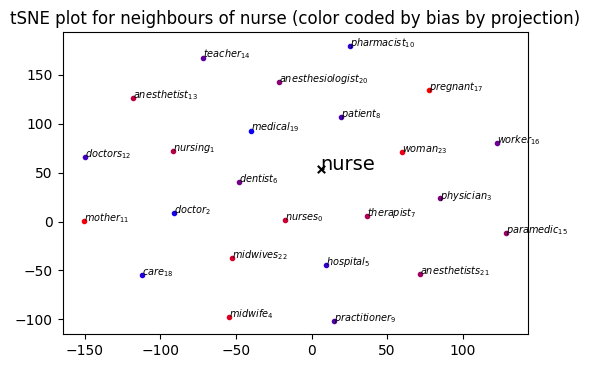

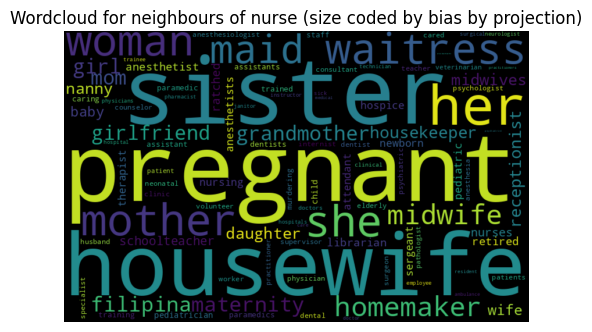

In [3]:
WordReport(E).generate('nurse', n=25)

In [4]:
report = NeighboursAnalysis(E).generate('nurse')
print(report)

        Neighbour  Bias by projection
0        pregnant            0.376227
1          sister            0.351646
2       housewife            0.328079
3          mother            0.323706
4             her            0.323242
..            ...                 ...
94        medical            0.007221
95  practitioners            0.006074
96   psychiatrist            0.003887
97     accountant            0.003356
98          medic            0.002596

[99 rows x 2 columns]


               words  bias by projection
0      bare-breasted            0.452874
1           schorpen            0.431729
2   oly-2004-fhockey            0.420213
3          lactating            0.419348
4          kuppinger            0.412581
..               ...                 ...
95           seacole            0.344846
96     kirchschlager            0.344835
97       tragedienne            0.344722
98            karala            0.344689
99           charima            0.344298

[100 rows x 2 columns] 

            words  bias by projection
0         chosŏn        2.908148e-05
1           osha        2.802070e-05
2       catalans        2.801232e-05
3       hofinger        2.771616e-05
4      fortaleza        2.759881e-05
..           ...                 ...
95  glider-style        2.950430e-06
96      brummies        1.970679e-06
97  unthreatened        1.938082e-06
98        damion        1.579523e-06
99           hap        7.357448e-07

[100 rows x 2 columns]


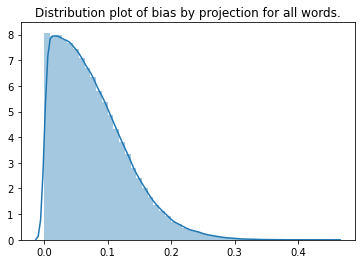

In [5]:
GlobalReport(E).generate(n=100)

Direct bias (Bias by projection on the PCA based gender direction): 0.2515009939670563
Proximity bias (Ratio of biased neighbours by Indirect Bias): 0.31
Neighbour Analysis: 
           Neighbour  Bias by projection
0           pregnant            0.376227
1             sister            0.351646
2             mother            0.323706
3              woman            0.307836
4               maid            0.287063
5            midwife            0.282145
6           filipina            0.281075
7         girlfriend            0.263949
8        housekeeper            0.245811
9       receptionist            0.237638
10          midwives            0.228787
11              wife            0.196644
12     schoolteacher            0.186744
13            nurses            0.170458
14       anesthetist            0.160549
15           nursing            0.149175
16           hospice            0.149094
17         therapist            0.147842
18         pediatric            0.141789
19   

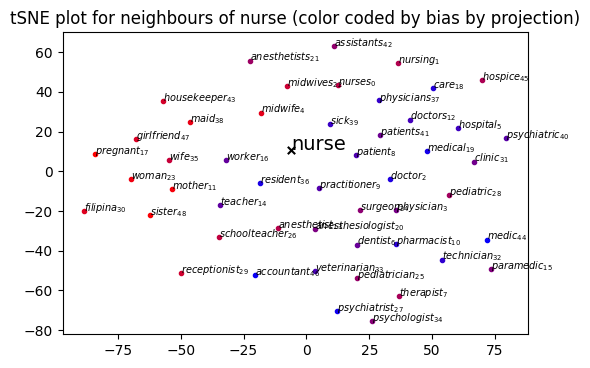

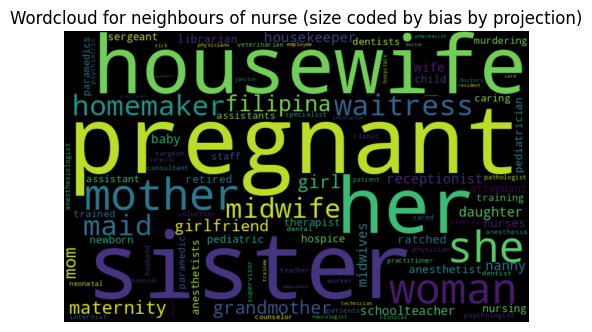

In [6]:
WordReport(E).generate('nurse')

# Visualizations

In [7]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias
from fee.visualize import GCT, PCAComponents, NeighbourPlot, NBWordCloud

In [8]:
E = loader.WE().load(ename = 'glove-wiki-gigaword-300', normalize=True)
g = fee.utils.get_g(E)

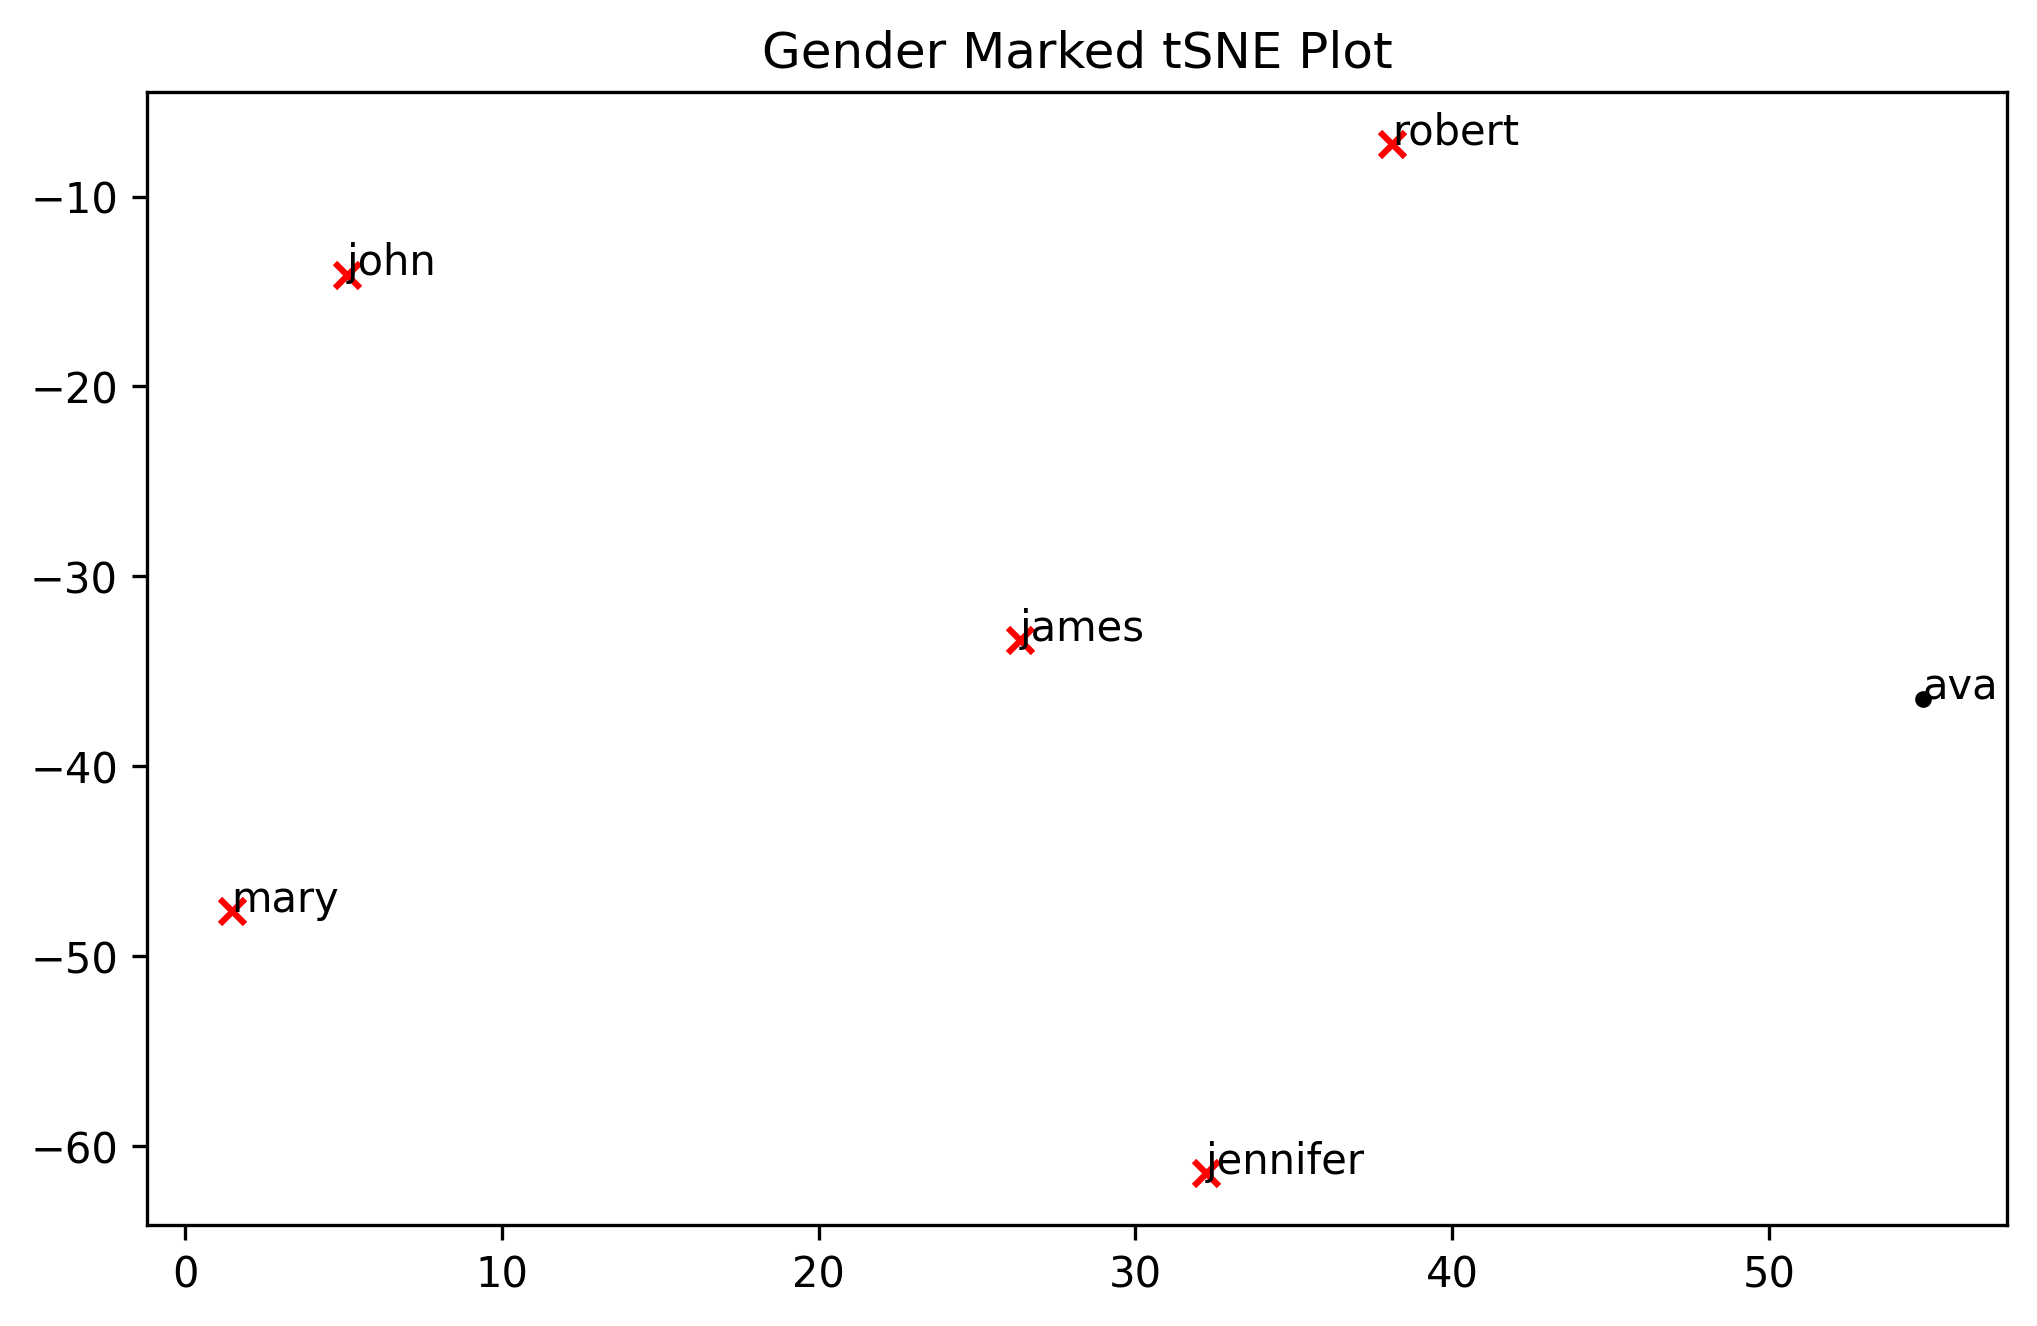

In [9]:
words = "mary ava jennifer john james robert".split()
GCT(E).run(words, title="Gender Marked tSNE Plot")

In [10]:
definitional = [['woman', 'man'],
                        ['girl', 'boy'],
                        ['she', 'he'],
                        ['mother', 'father'],
                        ['daughter', 'son'],
                        ['gal', 'guy'],
                        ['female', 'male'],
                        ['her', 'his'],
                        ['herself', 'himself'],
                        ['mary', 'john']]

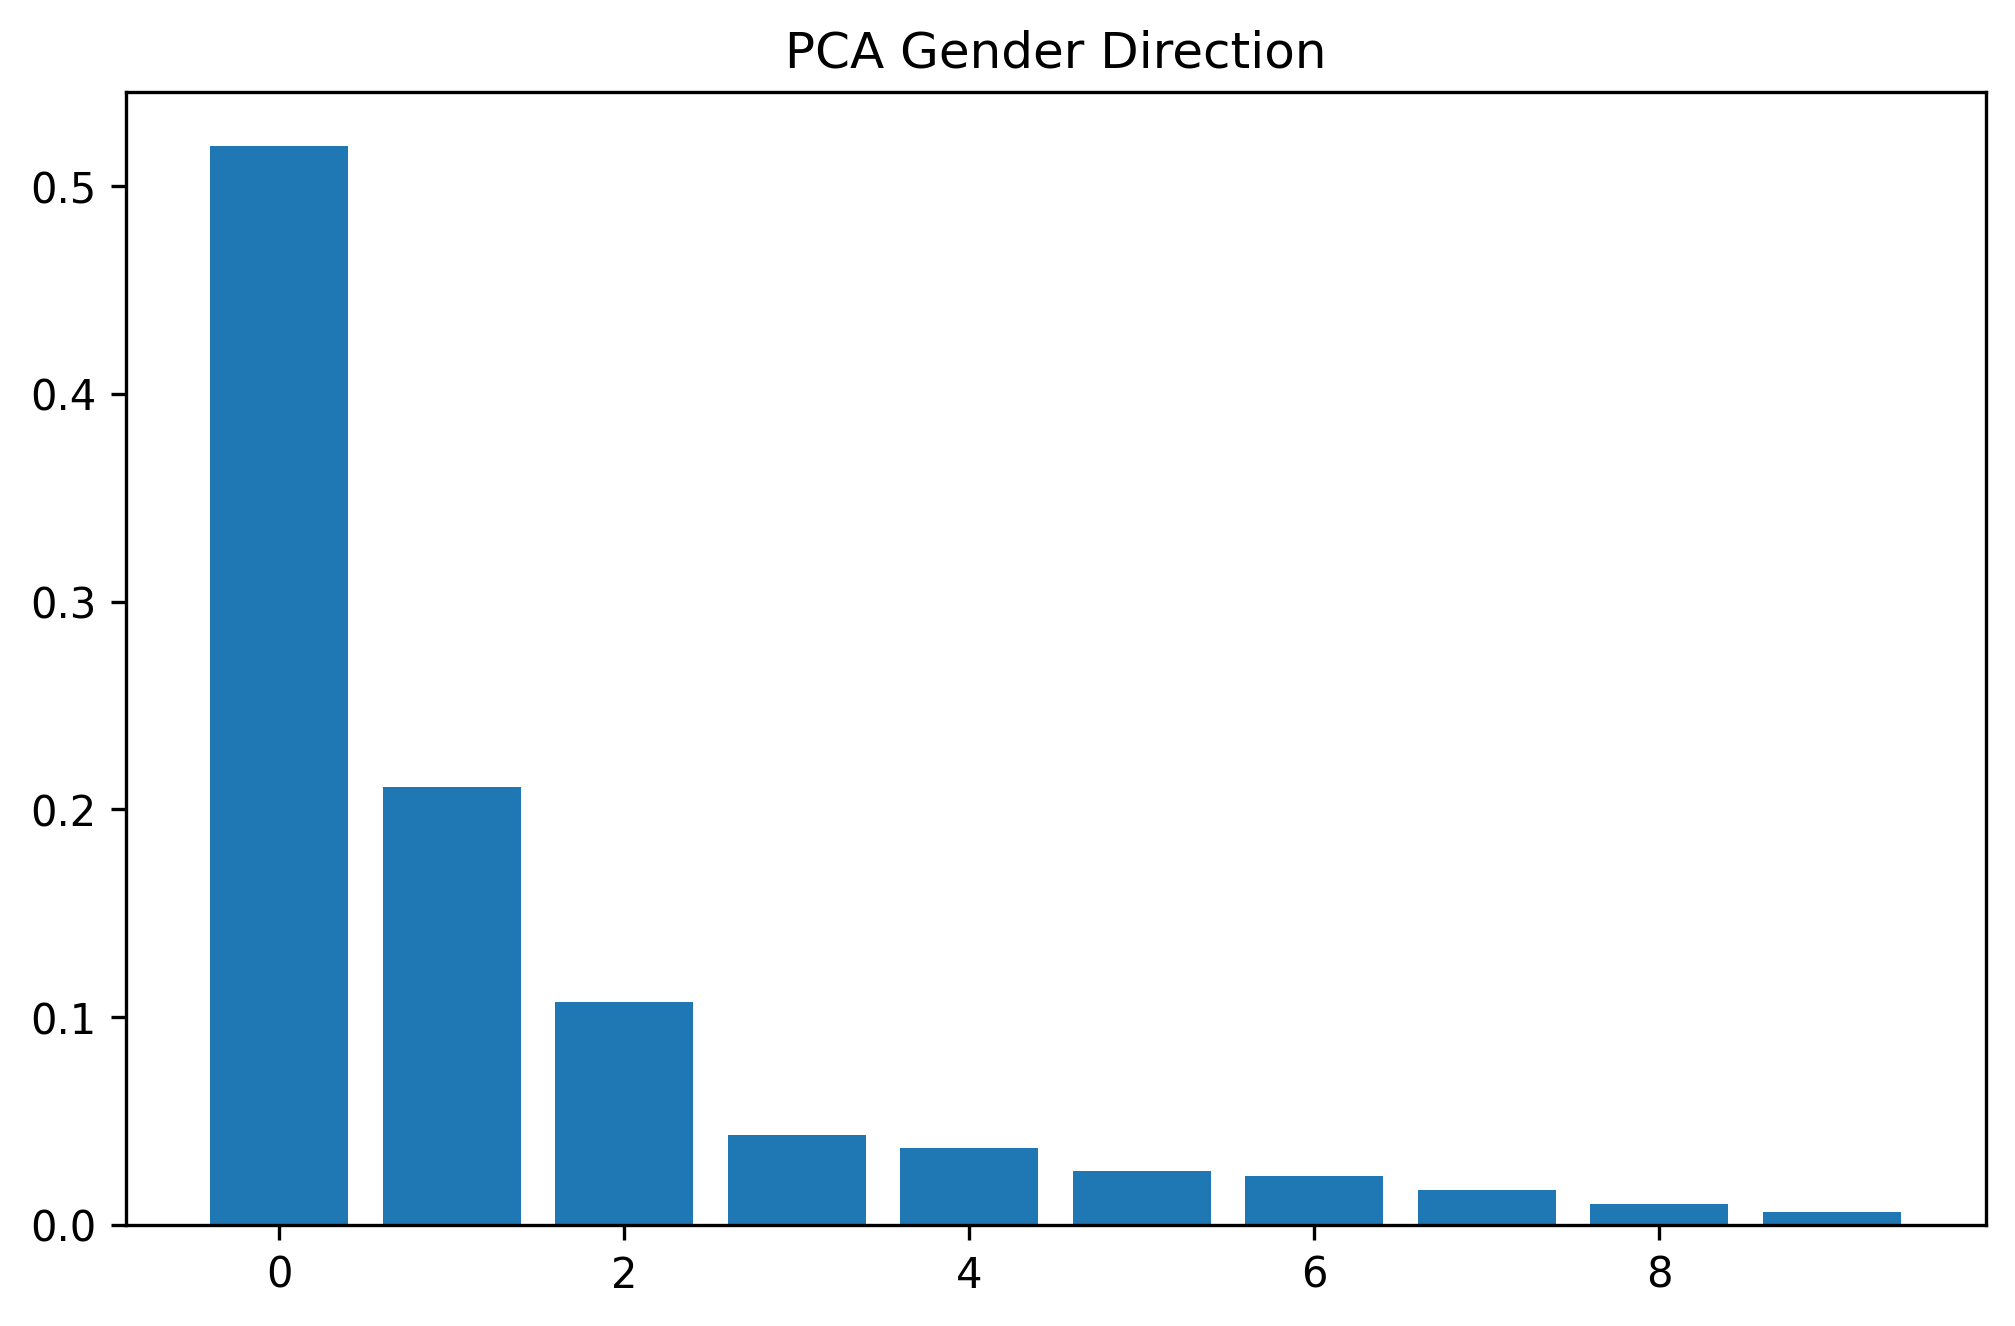

In [11]:
PCAComponents(E).run(definitional, title="PCA Gender Direction")

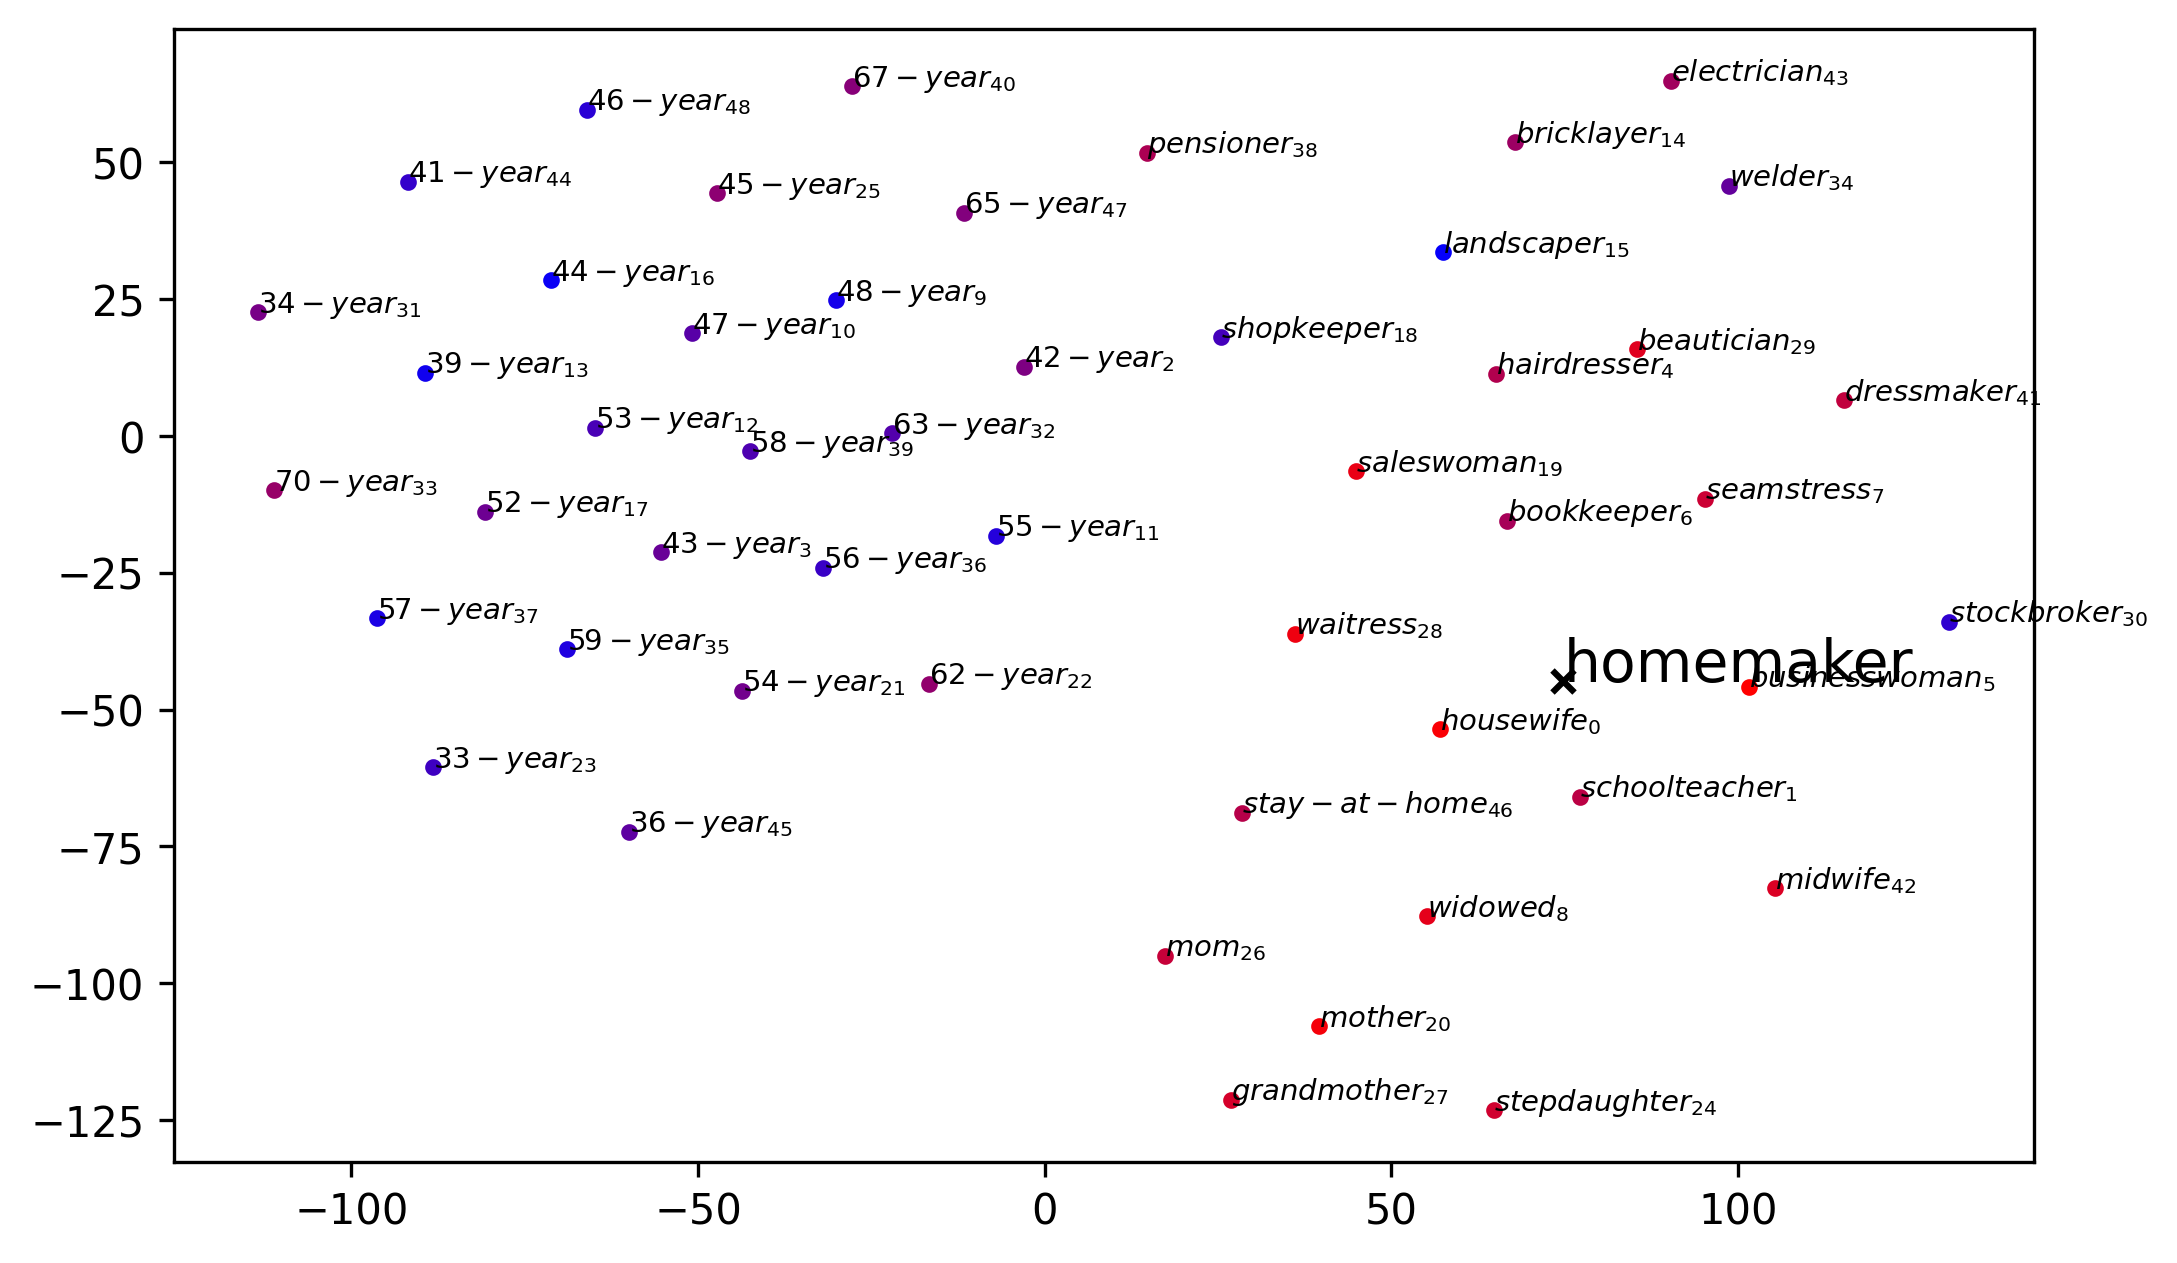

In [12]:
NeighbourPlot(E).run('homemaker', annotate=True, n=50)

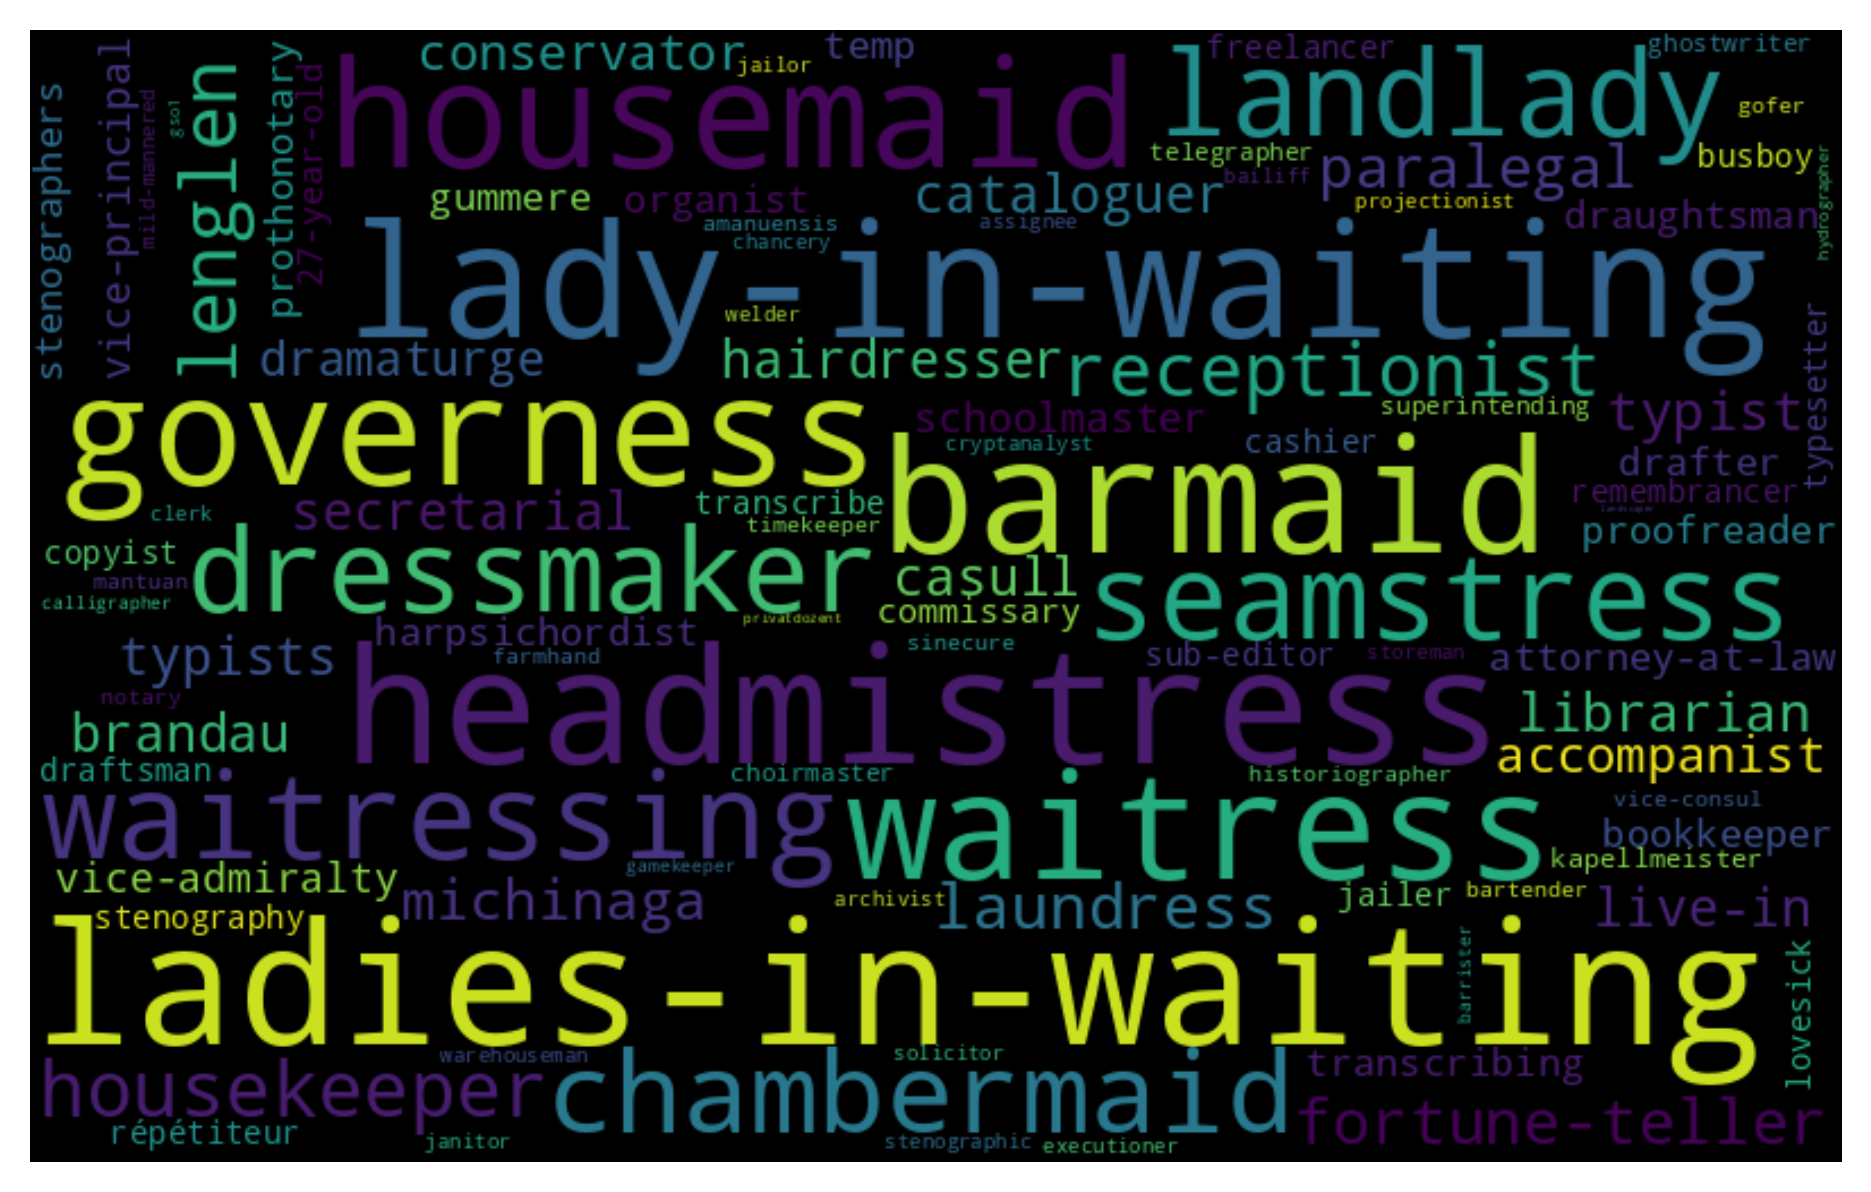

In [13]:
NBWordCloud(E).run('stenographer')

# Debiasing

In [14]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias
from fee.debias import HardDebias, RANDebias, HSRDebias

In [15]:
E = loader.WE().load(ename = 'glove-wiki-gigaword-300', normalize=True)
g = fee.utils.get_g(E)

In [16]:
gender_list = "he she him her uncle aunt father mother".split()
nongender_list = list(set(E.words) - set(gender_list))
DirectBias(E).compute(nongender_list)

0.07548518366912707

In [17]:
E = HSRDebias(E).run(gender_list)

In [18]:
DirectBias(E).compute(nongender_list)

0.07328593463052044

In [19]:
words = "nanny nurse warrior doctor engineer".split()
DirectBias(E).compute(words)

0.14182949168607592

In [20]:
E = RANDebias(E).run(words)

In [21]:
DirectBias(E).compute(words)

0.012994961440563202

In [22]:
E = HardDebias(E).run(words)

In [23]:
DirectBias(E).compute(words)

0.009953945828601717

# Metrics

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias, IndirectBias, GIPE, ProxBias, WEAT, PMN, SemBias

In [25]:
E = loader.WE().load(ename = 'glove-wiki-gigaword-300', normalize=True)
words = "nurse nanny warrior engineer doctor calculate bias metrics for these words".split()

In [26]:
SemBias(E).compute()

(0.7863636363636364, 0.15, 0.06363636363636363)

In [27]:
PMN(E).compute(words)

40.45454545454545

In [28]:
DirectBias(E).compute(words)

0.09905925807966427

In [29]:
IndirectBias(E).compute('woman', 'nanny')

0.2261568

In [30]:
GIPE(E).compute(words)

0.33818181818181814

In [31]:
ProxBias(E).compute(words)

0.10454545454545454

In [32]:
WEAT(E).compute("female", "male", "arts", "math", p_val=True)

(0.8316222, 0.0)